Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Status Optimal
83.5
s1,1 6.0
s1,2 8.5
s1,3 26.5
s1,4 33.5
s1,5 33.5
s1,6 40.5
s1,7 47.5
s1,8 62.5
s1,9 67.5
s2,1 0.0
s2,2 2.0
s2,3 5.5
s2,4 11.5
s2,5 11.5
s2,6 14.5
s2,7 17.5
s2,8 32.5
s2,9 57.5
s3,1 0.0
s3,2 0.0
s3,3 0.0
s3,4 0.0
s3,5 0.0
s3,6 0.0
s3,7 0.0
s3,8 17.5
s3,9 17.5
s4,1 0.0
s4,2 0.0
s4,3 0.0
s4,4 0.0
s4,5 0.0
s4,6 1.0
s4,7 7.5
s4,8 17.5
s4,9 53.5
s5,1 4.0
s5,2 11.5
s5,3 14.5
s5,4 14.5
s5,5 17.5
s5,6 22.5
s5,7 62.5
s5,8 77.5
s5,9 77.5
s6,1 2.0
s6,2 5.5
s6,3 8.5
s6,4 8.5
s6,5 16.5
s6,6 17.5
s6,7 32.5
s6,8 47.5
s6,9 47.5
x1,1,2,1 0.0
x1,1,3,1 0.0
x1,1,4,1 0.0
x1,1,5,1 0.0
x1,1,6,1 0.0
x1,2,2,2 0.0
x1,2,3,2 0.0
x1,2,4,2 0.0
x1,2,5,2 1.0
x1,2,6,2 0.0
x1,3,2,3 0.0
x1,3,3,3 0.0
x1,3,4,3 0.0
x1,3,5,3 0.0
x1,3,6,3 0.0
x1,4,2,4 0.0
x1,4,3,4 0.0
x1,4,4,4 0.0
x1,4,5,4 0.0
x1,4,6,4 0.0
x1,5,2

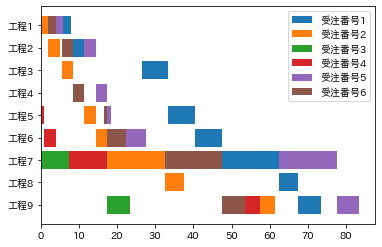

In [9]:
# 記入する文字は全て半角英数字でお願いします．
# 受注の現実的な限界値は5個まで．それ以上はすごい時間かかるかもしれません．

!pip install pulp
!pip install japanize-matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib
from pulp import *
from google.colab import files

# 作業工程は4つあります
# ①受注の本数の追加・削除
# ②受注内容の記入
# ③工程の追加
# ④画像に任意の名前をつけて下さい(一番下にあります)


# ここは変更なし
K = (1, 2, 3, 4, 5, 6, 7, 8, 9)

# ①
# 注文本数を入力します
# 受注の数によって変動させて下さい　（1, 2, ・・, 5）
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
#
#       例１：受注数1本→　I = (1)
#       例2：受注数3本→　I = (1, 2, 3)
#
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
I = (1, 2, 3, 4, 5, 6)


#②
#　{(x,y):z}　→ 案件 x の工程 y にかかる時間 z
# かかる時間　"z"　は任意で変更可能です
#　 "x"　には受注番号を入力して下さい
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
#
#       ☆☆要編集：コピペ欄↓↓☆☆                                                                
#       MainOH→(x,1):2,(x,2):3,(x,3):7,(x,4):0,(x,5):7,(x,6):7,(x,7):15,(x,8):5,(x,9):6,
#       MainTC→(x,1):2,(x,2):3,(x,3):3,(x,4):0,(x,5):3,(x,6):3,(x,7):15,(x,8):5,(x,9):4,
#       NoseOH→(x,1):2,(x,2):3,(x,3):0,(x,4):3,(x,5):1,(x,6):5,(x,7):15,(x,8):0,(x,9):6,
#       NoseTC→(x,1):2,(x,2):3,(x,3):0,(x,4):2,(x,5):1,(x,6):3,(x,7):15,(x,8):0,(x,9):4,
#
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
#
#                                             ☆☆Tips1☆☆
#       前日の残り工程などがある場合には，該当の受注番号の終了している工程にかかる作業時間 "z" を0にして下さい
#     
#       例1：　前日のまでに "工程4" まで終えている場合の,MainOHの受注を入力したいとき
#       MainOH（通常 Ver）               → (x,1):2,(x,2):3,(x,3):7,(x,4):0,(x,5):7,(x,6):7,(x,7):15,(x,8):5,(x,9):6,
#       MainOH（工程4まで終えている Ver） → (x,1):0,(x,2):0,(x,3):0,(x,4):0,(x,5):7,(x,6):7,(x,7):15,(x,8):5,(x,9):6,
#                                                ↑　　　　　　　　　↑     ↑　　　　　　　　　↑
#                                                       　　　変更点
#
#
#       例2：　前日のまでに "工程6" まで終えている場合の,NoseOHの受注を入力したいとき
#       NoseOH（通常 Ver）               → (x,1):2,(x,2):3,(x,3):0,(x,4):3,(x,5):1,(x,6):5,(x,7):15,(x,8):0,(x,9):6,
#       NoseOH（工程6まで終えている Ver） → (x,1):0,(x,2):0,(x,3):0,(x,4):0,(x,5):0,(x,6):0,(x,7):15,(x,8):0,(x,9):6,
#                                                ↑　　　　　　　　　↑     ↑　　　　　　　　　↑      ↑　　　　　　　　　↑    　　
#                                                    　　          　変更点
#
#
#                                              ☆☆Tips2☆☆
#       任意の工程に人員をかけることで， 工程にかける時間を減らす場合には，　該当の工程にかかる作業時間　"z"　を任意の値に調整して下さい
#
#　       例1：　"工程7" の作業時間を　"１５時間　"から　"7．5時間"　に変更する場合
#       MainTC（通常 Ver）                → (x,1):2,(x,2):3,(x,3):3,(x,4):0,(x,5):3,(x,6):3,(x,7):15,(x,8):5,(x,9):4,
#       MainTC（工程7の作業時間変更 Ver） → (x,1):2,(x,2):3,(x,3):3,(x,4):0,(x,5):3,(x,6):3,(x,7):7.5,(x,8):5,(x,9):4,
#                                                                                              ↑
#                                                                                            変更点
#
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

processtime = {
                # 受注番号1　記入欄↓↓
                (1,1):2,(1,2):3,(1,3):7,(1,4):0,(1,5):7,(1,6):7,(1,7):15,(1,8):5,(1,9):6, 
               
               # 受注番号2　記入欄↓↓
                (2,1):2,(2,2):3,(2,3):3,(2,4):0,(2,5):3,(2,6):3,(2,7):15,(2,8):5,(2,9):4,
               
               # 受注番号3　記入欄↓↓
                (3,1):0,(3,2):0,(3,3):0,(3,4):0,(3,5):0,(3,6):0,(3,7):7.5,(3,8):0,(3,9):6,  
               
               # 受注番号4　記入欄↓↓
                (4,1):0,(4,2):0,(4,3):0,(4,4):0,(4,5):1,(4,6):3,(4,7):10,(4,8):0,(4,9):4,  
               
               # 受注番号5　記入欄↓↓
                (5,1):2,(5,2):3,(5,3):0,(5,4):3,(5,5):1,(5,6):5,(5,7):15,(5,8):0,(5,9):6,
               
               # 受注番号6　記入欄↓↓
                (6,1):2,(6,2):3,(6,3):0,(6,4):3,(6,5):1,(6,6):5,(6,7):15,(6,8):0,(6,9):6,
               }


# ③
# (A, N) 受注 "A" の "N" 番目の工程を行うprocess
# "x" には該当の受注番号を入力して下さい
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
#
#       ☆☆要編集：コピペ欄↓↓☆☆
#       (x,1):1,(x,2):2,(x,3):3,(x,4):4,(x,5):5,(x,6):6,(x,7):7,(x,8):8,(x,9):9, 
#
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

# 注文の本数だけ，受注番号の1行下の先頭の "#" を外して下さい
# 注文する本数より大きい受注番号の1行下には先頭に "#" をつけて下さい

process = {
          # 受注番号1
          (1,1):1,(1,2):2,(1,3):3,(1,4):4,(1,5):5,(1,6):6,(1,7):7,(1,8):8,(1,9):9, 
           
          # 受注番号2
          (2,1):1,(2,2):2,(2,3):3,(2,4):4,(2,5):5,(2,6):6,(2,7):7,(2,8):8,(2,9):9,
           
          # 受注番号3
          (3,1):1,(3,2):2,(3,3):3,(3,4):4,(3,5):5,(3,6):6,(3,7):7,(3,8):8,(3,9):9,  
           
          # 受注番号4
          (4,1):1,(4,2):2,(4,3):3,(4,4):4,(4,5):5,(4,6):6,(4,7):7,(4,8):8,(4,9):9,
           
          # 受注番号5
          (5,1):1,(5,2):2,(5,3):3,(5,4):4,(5,5):5,(5,6):6,(5,7):7,(5,8):8,(5,9):9,
           
          # 受注番号6
          (6,1):1,(6,2):2,(6,3):3,(6,4):4,(6,5):5,(6,6):6,(6,7):7,(6,8):8,(6,9):9,
          } 

M=10000
s={}
x={}

# モデルの作成
model = LpProblem(sense=LpMinimize)

# 変数の宣言
mkspn = LpVariable('mkspn',lowBound=0,upBound=None,cat='Continious')

for i in I:
  for k in K:
    s[i,k] = LpVariable('s{},{}'.format(i,k),lowBound=0,upBound=None,cat='Continious')

for i in I:
  for k in K:
    for j in I:
      for l in K:
        if (i != j) & (process[i,k] == process[j,l]):
          x[i,k,j,l] = LpVariable('x{},{},{},{}'.format(i,k,j,l),cat='Binary')

# 目的関数
model += mkspn

# 制約条件
for i in I:
  for k in K:
    model += mkspn >= s[i,k]+processtime[i,k]
    model += s[i,k]>=0

for i in I:
  for k in range(1,len(K)):
    model += s[i,k+1]>= s[i,k]+processtime[i,k]

for i in I:
  for k in K:
    for j in I:
      for l in K:
        if (i != j) & (process[i,k] == process[j,l]):
          model += s[j,l]>= s[i,k]+processtime[i,k]-M*(1-x[i,k,j,l])
          model += s[i,k]>= s[j,l]+processtime[j,l]-M*x[i,k,j,l]
          model += x[i,k,j,l] + x[j,l,i,k] ==1

result = model.solve()
print('Status', LpStatus[result])
print(value(model.objective))

for i in I:
  for k in K:
    print(s[i,k],value(s[i,k]))

for i in I:
  for k in K:
    for j in I:
      for l in K:
        if (i != j) & (process[i,k] == process[j,l]):
          print(x[i,k,j,l],value(x[i,k,j,l]))

fig, ax = plt.subplots()


# 縦軸 ＝ 工程数
processes = []


# 横軸 ＝ かかる時間
process_time = []
start_time = []
for k in K:
  processes.append('工程{}'.format(k))
  start_time.append(0)
  process_time.append(0)
processes.reverse()

for i in I:
  for k in K:
    start_time[process[i,k]-1] = value(s[i,k])
    process_time[process[i,k]-1] = processtime[i,k]
  start_time.reverse()
  process_time.reverse()
  ax.barh(processes, process_time, label='受注番号{}'.format(i), left = start_time, )
  ax.legend()

# ④保存したい名前をつけて実行して下さい(※2箇所)
# plt.savefig("1125_2.png")
# files.download("1125_2.png")

